In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, special, linalg
%config Completer.use_jedi = False
import healpy as hp
import tqdm
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


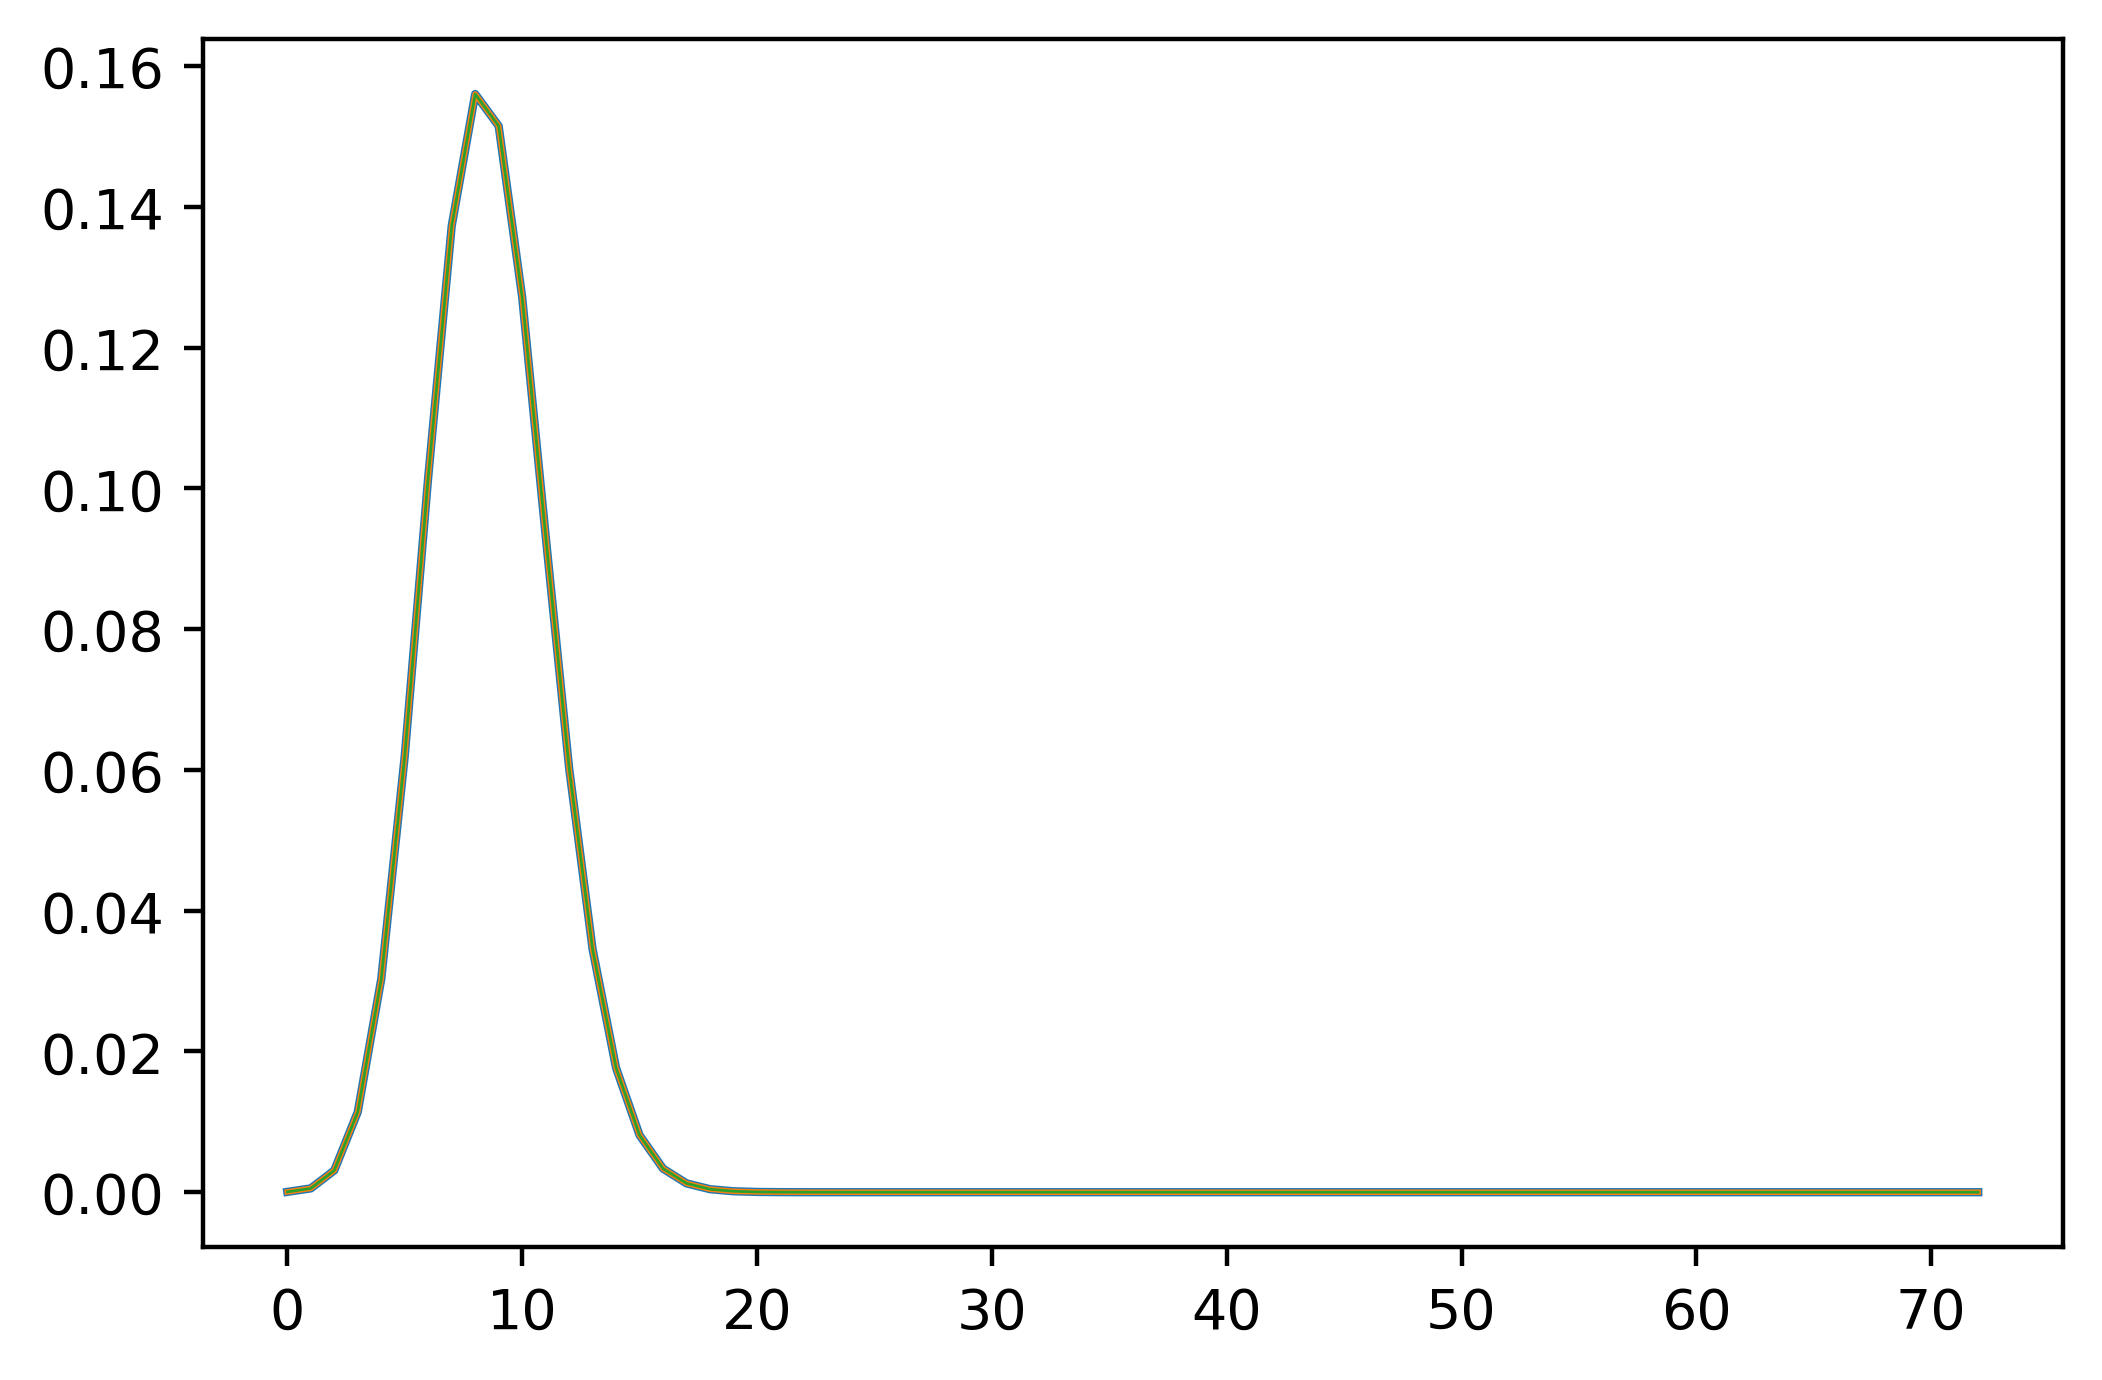

In [43]:
from poisson_binomial import poisson_binomial_pmf, poisson_binomial_pmf_forward, poisson_binomial_pmf_backward, poisson_binomial_subpmf
from poisson_binomial import poisson_binomial_lpmf_forward, poisson_binomial_lpmf_backward, poisson_binomial_sublpmf

c=5
if False: 
    k = 192
    n = 269
    p = np.zeros(n)
    p[:200] = 0.0065939
    p[200:] = 0.102494
elif False:
    n = 100
    k = 80
    p = np.zeros(n)
    p = np.random.uniform(0,0.001,n)
elif False:
    n = 114
    k = 81
    p = np.zeros(n)
    p[:36] = 0.669345
    p[36:] = 0.262181
elif False:
    n = 113
    k = 69
    p = np.zeros(n)
    p[:25] = 0.0504624
    p[25:] = 0.0258087
    0.694585
elif True:
    n = 72
    k = 51
    p = np.zeros(n)
    p[:15] = 0.364329
    p[15:] = 0.05463
else:
    n = 255
    k = 51
    p = np.random.uniform(0,1,n)
    
pmf_original = np.zeros(n+1)
poisson_binomial_pmf(p,n,pmf_original)
plt.plot(pmf_original)

pmf_forward = np.zeros((n,n+1))
poisson_binomial_pmf_forward(p,n,pmf_forward)
plt.plot(pmf_forward[-1],lw=1)

pmf_backward = np.zeros((n,n+1))
poisson_binomial_pmf_backward(p,n,pmf_backward)
plt.plot(pmf_backward[0],lw=0.5)

subpmf = np.zeros((n,n))
for i in range(n):
    poisson_binomial_subpmf(i,p,n,pmf_forward,pmf_backward,subpmf[:,i])
#poisson_binomial_subpmf(k-1,p,n,pmf_forward,pmf_backward,subpmf[1])
#poisson_binomial_subpmf(k,p,n,pmf_forward,pmf_backward,subpmf[2])

subpmfexact = np.zeros((n,n))
poisson_binomial_pmf(p[1:],n-1,subpmfexact[0,:])
poisson_binomial_pmf(p[:-1],n-1,subpmfexact[-1,:])
for i in range(1,n-1):
    poisson_binomial_pmf(np.concatenate([p[:i],p[i+1:]]),n-1,subpmfexact[i,:])
    
assert np.allclose(pmf_forward[-1],pmf_original)
assert np.allclose(pmf_backward[0],pmf_original)
for m in range(n):
    assert np.allclose(subpmf[m],subpmfexact[m])
    
lpmf_forward = np.zeros((n,n+1))
poisson_binomial_lpmf_forward(p,n,lpmf_forward)
assert np.allclose(pmf_forward[-1],np.exp(lpmf_forward[-1]))

lpmf_backward = np.zeros((n,n+1))
poisson_binomial_lpmf_backward(p,n,lpmf_backward)
assert np.allclose(pmf_backward[0],np.exp(lpmf_backward[0]))

sublpmf = np.zeros((n,n))
for i in range(n):
    poisson_binomial_sublpmf(i,p,n,lpmf_forward,lpmf_backward,sublpmf[:,i])
assert np.allclose(subpmf,np.exp(sublpmf))

In [44]:
%%timeit
poisson_binomial_lpmf_forward(p,n,lpmf_forward)
poisson_binomial_lpmf_backward(p,n,lpmf_backward)
poisson_binomial_sublpmf(c-1,p,n,lpmf_forward,lpmf_backward,sublpmf[:,c-1])
poisson_binomial_sublpmf(k-1,p,n,lpmf_forward,lpmf_backward,sublpmf[:,k-1])
poisson_binomial_sublpmf(k,p,n,lpmf_forward,lpmf_backward,sublpmf[:,k])

228 µs ± 5.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
%%timeit
poisson_binomial_pmf_forward(p,n,pmf_forward)
poisson_binomial_pmf_backward(p,n,pmf_backward)
poisson_binomial_subpmf(c-1,p,n,pmf_forward,pmf_backward,subpmf[:,c-1])
poisson_binomial_subpmf(k-1,p,n,pmf_forward,pmf_backward,subpmf[:,k-1])
poisson_binomial_subpmf(k,p,n,pmf_forward,pmf_backward,subpmf[:,k])

12 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [32]:
%timeit poisson_binomial_pmf_forward(p,n,pmf_forward)

46.6 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
%timeit poisson_binomial_subpmf(k,p,n,pmf_forward,pmf_backward,subpmf[:,k])

107 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [35]:
%timeit poisson_binomial_sublpmf(k,p,n,lpmf_forward,lpmf_backward,sublpmf[:,k])

556 µs ± 39.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
np.exp(sublpmf)

array([[0.0001541 , 0.00141786, 0.00645255, ..., 0.        , 0.        ,
        0.        ],
       [0.0001541 , 0.00141786, 0.00645255, ..., 0.        , 0.        ,
        0.        ],
       [0.0001541 , 0.00141786, 0.00645255, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00017057, 0.00155101, 0.00697531, ..., 0.        , 0.        ,
        0.        ],
       [0.00017057, 0.00155101, 0.00697531, ..., 0.        , 0.        ,
        0.        ],
       [0.00017057, 0.00155101, 0.00697531, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
subpmf

array([[0.0001541 , 0.00141786, 0.00645255, ..., 0.        , 0.        ,
        0.        ],
       [0.0001541 , 0.00141786, 0.00645255, ..., 0.        , 0.        ,
        0.        ],
       [0.0001541 , 0.00141786, 0.00645255, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00017057, 0.00155101, 0.00697531, ..., 0.        , 0.        ,
        0.        ],
       [0.00017057, 0.00155101, 0.00697531, ..., 0.        , 0.        ,
        0.        ],
       [0.00017057, 0.00155101, 0.00697531, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
for i in range(n):
    print(pmf_forward)

In [22]:
assert np.allclose(pmf_forward[-1],np.exp(lpmf_forward[-1]))

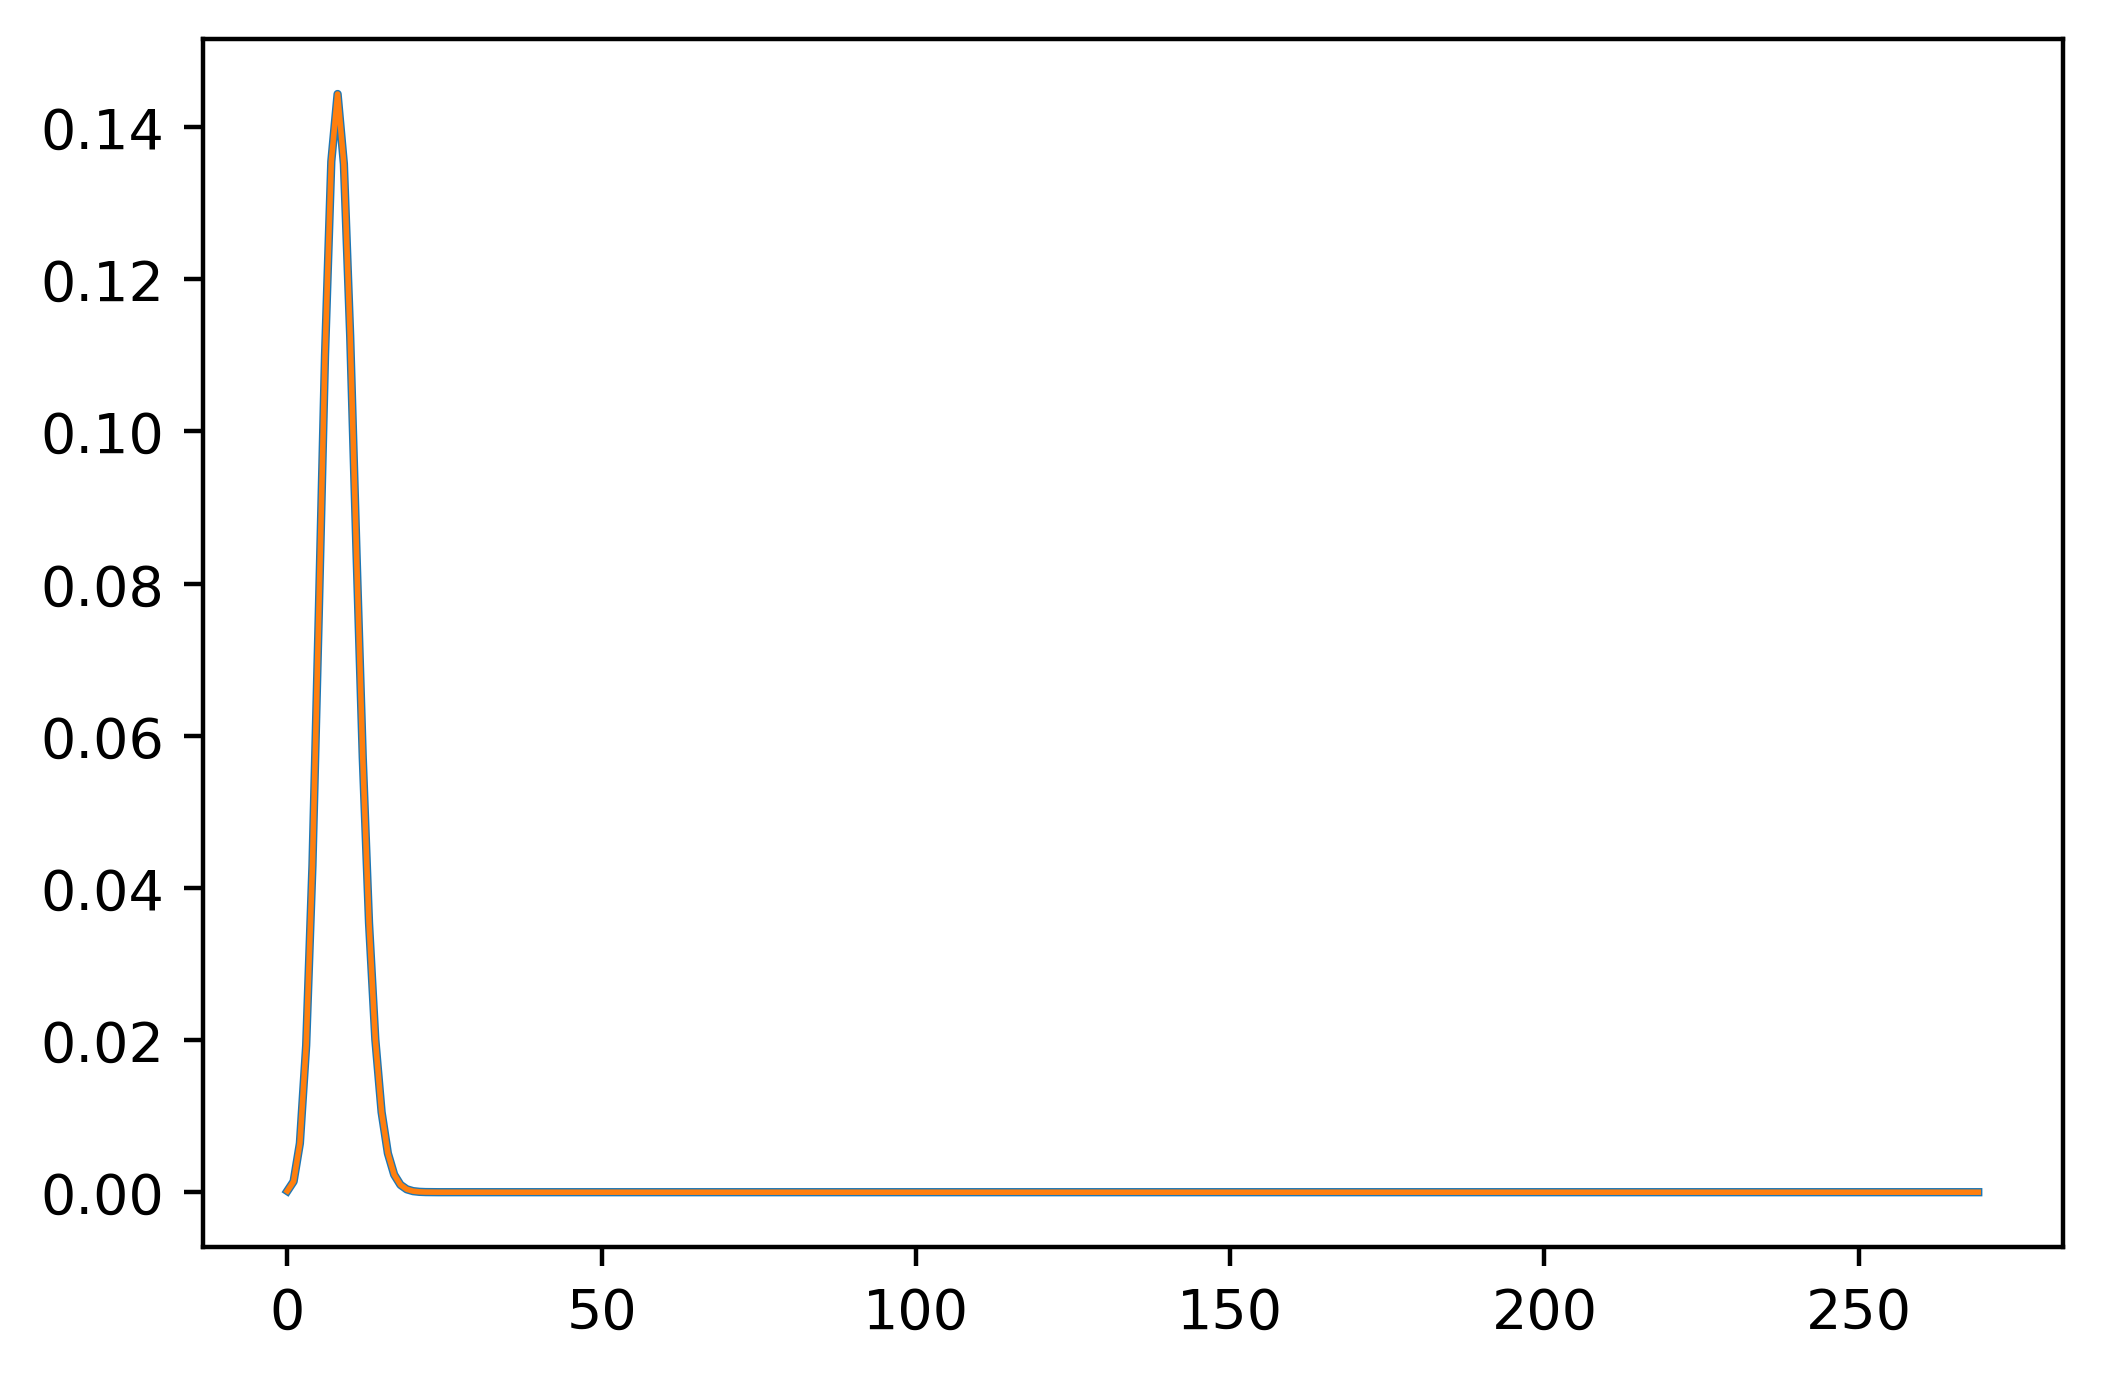

In [19]:
plt.plot(pmf_forward[-1])
plt.plot(np.exp(lpmf_forward[-1]),lw=1)

In [ ]:
lmda = sum(p)
sigma2 = sum(p*(1-p))
P = sum(p)/n
s2 = sum(np.square(p-P))/n
kappa = lmda*(n-lmda)-sigma2
theta = -n*s2/kappa
print(P,theta)
def polya(k,P,n,theta):
    return special.binom(n,k)*np.prod([P+i*theta for i in range(k)])*np.prod([1.0-P+i*theta for i in range(n-k)])/np.prod([1.0+i*theta for i in range(n)])
polya_pmf = np.array([polya(k,P,n,theta) for k in range(n+1)])

In [ ]:
K = np.arange(0,n+1)
rate = sum(p)
plt.plot(K,pmf_original)
plt.plot(K,polya_pmf,lw=1)
plt.plot(K,stats.poisson(rate).pmf(K),lw=1)
plt.yscale('log')

In [ ]:
rate = sum(p)
#plt.hist(K,bins=np.arange(-0.5,n+1),weights=pmf_original,histtype='step')
plt.stairs(pmf_original,np.arange(-0.5,n+1))
K = np.arange(0,n+1)
from scipy import special,stats
#plt.hist(K,bins=np.arange(-0.5,n+1),weights=stats.poisson(rate).pmf(K),histtype='step')
#plt.hist(K,bins=np.arange(-0.5,n+1),weights=stats.binom(n=n,p=rate/n).pmf(K),histtype='step');
#plt.hist(K,bins=np.arange(-0.5,n+1),weights=stats.norm(loc=sum(p),scale=np.sqrt(sum(p*(1-p)))).pdf(K),histtype='step');
#plt.hist(K,bins=np.arange(-0.5,n+1),weights=polya_pmf,histtype='step');

plt.yscale('log')
plt.ylim([1e-100,1])

In [ ]:
rate

In [ ]:
0.5*(pmf_forward[-1,k]+pmf_backward[0,k])

In [ ]:
pmf_forward[-1,:]

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1)
m = 5
ax1.semilogy(subpmfexact[m])
ax1.semilogy(subpmf[m],lw=1)

ax2.plot((subpmf[m]-subpmfexact[m])/subpmfexact[m])
#plt.plot(subpmfexact[:,0],lw=1)
#plt.savefig('./tmp.png',dpi=300,bbox_inches='tight',facecolor="w")

In [ ]:
from poisson_binomial import poisson_binomial_pmf, poisson_binomial_pmf_forward, poisson_binomial_pmf_backward, poisson_binomial_subpmf, poisson_binomial_subpmf_fast
c=5
n = 200
k = 100
p = np.random.uniform(0,1,n)

pmf_original = np.zeros(n+1)
print('Original')
%time poisson_binomial_pmf(p,n,pmf_original)
plt.plot(pmf_original)

pmf_forward = np.zeros((n,n+1))
print('Forward')
%time poisson_binomial_pmf_forward(p,n,pmf_forward)
plt.plot(pmf_forward[-1],lw=1)

pmf_backward = np.zeros((n,n+1))
print('Backward')
%time poisson_binomial_pmf_backward(p,n,pmf_backward)
plt.plot(pmf_backward[0],lw=0.5)

subpmf = np.zeros(n)
print('Convolution')
%time poisson_binomial_subpmf(c-1,p,n,pmf_forward,pmf_backward,subpmf)
%time poisson_binomial_subpmf_fast(c-1,p,n,pmf_forward,pmf_backward,subpmf)

In [ ]:
%%timeit
poisson_binomial_pmf(p,n,pmf_original)

In [ ]:
%%timeit
poisson_binomial_pmf_forward(p,n,pmf_forward)

In [ ]:
%%timeit
poisson_binomial_pmf_backward(p,n,pmf_backward)

In [ ]:
%%timeit 
poisson_binomial_subpmf(c-1,p,n,pmf_forward,pmf_backward,subpmf)

In [ ]:
%%timeit
poisson_binomial_subpmf(k-1,p,n,pmf_forward,pmf_backward,subpmf)

In [ ]:
%%timeit
poisson_binomial_subpmf(k,p,n,pmf_forward,pmf_backward,subpmf)

In [ ]:
%%timeit
poisson_binomial_pmf_forward(p,n,pmf_forward)
poisson_binomial_pmf_backward(p,n,pmf_backward)
poisson_binomial_subpmf(c-1,p,n,pmf_forward,pmf_backward,subpmf)
poisson_binomial_subpmf(k-1,p,n,pmf_forward,pmf_backward,subpmf)
poisson_binomial_subpmf(k,p,n,pmf_forward,pmf_backward,subpmf)

In [ ]:
%%timeit
poisson_binomial_pmf_forward(p,n,pmf_forward)
poisson_binomial_pmf_backward(p,n,pmf_backward)
poisson_binomial_subpmf(c-1,p,n,pmf_forward,pmf_backward,subpmf)
poisson_binomial_subpmf(k-1,p,n,pmf_forward,pmf_backward,subpmf)
poisson_binomial_subpmf(k,p,n,pmf_forward,pmf_backward,subpmf)

In [ ]:
%timeit min(3.2,5.6)

In [ ]:
%timeit 3.2*5.6

In [ ]:
200*0.124

In [ ]:
pmf_original = np.zeros(n+1)
print('Original')
%time poisson_binomial_pmf(p,n,pmf_original)
%timeit poisson_binomial_pmf(p,n,pmf_original)
plt.plot(pmf_original)

pmf_forward = np.zeros((n,n+1))
print('Forward')
%time poisson_binomial_pmf_forward(p,n,pmf_forward)
%timeit poisson_binomial_pmf_forward(p,n,pmf_forward)
plt.plot(pmf_forward[-1],lw=1)

pmf_backward = np.zeros((n,n+1))
print('Backward')
%time poisson_binomial_pmf_backward(p,n,pmf_backward)
%timeit poisson_binomial_pmf_backward(p,n,pmf_backward)
plt.plot(pmf_backward[0],lw=0.5)

subpmf = np.zeros(n)
print('Convolution')
%time 

In [ ]:
from poisson_binomial import poisson_binomial_pmf

if True:
    n = 114
    k = 81
    p = np.zeros(n)
    p[:36] = 0.669345
    p[36:] = 0.262181
elif False:
    n = 113
    k = 69
    p = np.zeros(n)
    p[:25] = 0.0504624
    p[25:] = 0.0258087
    0.694585
elif False:
    n = 72
    k = 51
    p = np.zeros(n)
    p[:15] = 0.364329
    p[15:] = 0.05463
else:
    n = 255
    k = 51
    p = np.random.uniform(0,1,n)
pmf = np.zeros(n+1)
subpmf = np.zeros(n)
poisson_binomial_pmf(p,n,pmf)

likelihood = pmf[k];
	
correction = 1.0;
PipelineMinVisits = 5
for i in range(PipelineMinVisits):
    correction -= pmf[i]

gradient_first_term = 1.0
gradient_second_term = 1.0
if k == 0:
    gradient_first_term = 0.0
elif k == n:
    gradient_second_term = 0.0

log_likelihood = np.log(likelihood/correction)
gradient = np.zeros(n)

for i in range(n):

    inv_p = 1.0/(1.0 - p[i])

    subpmf[0] = pmf[0] * inv_p
    for j in range(1,n):
        subpmf[j] = (pmf[j] - subpmf[j-1]*p[i])*inv_p
    subpmf[n-1] = pmf[n]/p[i]

    gradient[i] = (gradient_first_term*subpmf[k-1]-gradient_second_term*subpmf[k])/likelihood - subpmf[PipelineMinVisits-1]/correction

subpmfexact = np.zeros(n)
poisson_binomial_pmf(p[1:],n-1,subpmfexact)

In [ ]:
for i in range(1,1):
    print(i)

In [ ]:
from poisson_binomial import poisson_binomial_pmf, poisson_binomial_pmf_simple
n = 114
k = 81
p = np.random.uniform(0,1,n)

pmf = np.zeros(n+1)
poisson_binomial_pmf(p,n,pmf)

pmf_simple = np.zeros(n+1)
poisson_binomial_pmf_simple(p,n,pmf_simple)
plt.plot(pmf)
plt.plot(pmf_simple,lw=1)

In [ ]:
import mpmath
mpmath.mp.dps = 1000
a = [mpmath.mpf(pmf[i]) for i in range(n+1)]
asum = mpmath.norm(a,p=1)
a = [a[i]/asum for i in range(n+1)]
b = [mpmath.mpf(0) for i in range(n)]
q = mpmath.fdiv(mpmath.mpf(p[i]),asum)
b[0] = mpmath.fdiv(a[0],mpmath.fsub(1.0,q))
for j in range(1,n):
    #b[j] = (a[j] - b[j-1]*q)/(1.0-q)
    b[j] = mpmath.fdiv(mpmath.fsub(a[j],mpmath.fmul(b[j-1],q)),mpmath.fsub(1.0,q))
    #b[j] = b[j-1] + (a[j] - b[j-1])/(1.0-q)


In [ ]:
b[-2]

In [ ]:
i = 0
inv_p = 1.0/(1.0 - p[i])
subpmf[0] = pmf[0] * inv_p
for j in range(1,n):
    subpmf[j] = (pmf[j] - subpmf[j-1]*p[i])*inv_p
subpmf[n-1] = pmf[n]/p[i]

gradient[i] = (gradient_first_term*subpmf[k-1]-gradient_second_term*subpmf[k])/likelihood - subpmf[PipelineMinVisits-1]/correction

subpmfexact = np.zeros(n)
poisson_binomial_pmf(p[1:],n-1,subpmfexact)

In [ ]:
i = 0
inv_p = 1.0/(1.0 - p[i])
subpmf = np.zeros(n)
subpmf[0] = pmf[0] * inv_p
subpmf[1] = (pmf[1] - subpmf[0]*p[i])*inv_p
for j in range(2,n):
    subpmf[j] = ((1.0-p[i])*pmf[j]-p[i]*pmf[j-1]+p[i]*p[i]*subpmf[j-2])*inv_p*inv_p
#subpmf[n-1] = pmf[n]/p[i]

gradient[i] = (gradient_first_term*subpmf[k-1]-gradient_second_term*subpmf[k])/likelihood - subpmf[PipelineMinVisits-1]/correction

subpmfexact = np.zeros(n)
poisson_binomial_pmf(p[1:],n-1,subpmfexact)

In [ ]:

plt.plot(subpmfexact)
plt.plot(subpmf,marker='o',ms=2,lw=1)
plt.ylim([-1,1])

In [ ]:
i = 0
inv_p = 1.0/(1.0 - p[i])

peak = int(sum(p)-p[i])
#peak = int(n/2)
subpmf[0] = pmf[0] * inv_p
for j in range(1,peak+1):
    subpmf[j] = (pmf[j] - subpmf[j-1]*p[i])*inv_p

subpmf[n-1] = pmf[n]/p[i]
for j in reversed(range(peak+2,n)):
    subpmf[j-1] = (pmf[j]-(1.0-p[i])*subpmf[j])/p[i]

gradient[i] = (gradient_first_term*subpmf[k-1]-gradient_second_term*subpmf[k])/likelihood - subpmf[PipelineMinVisits-1]/correction

subpmfexact = np.zeros(n)
poisson_binomial_pmf(p[1:],n-1,subpmfexact)

In [ ]:
i = 0
inv_p = 1.0/(1.0 - p[i])

#peak = int(sum(p))
if np.abs(p[i]/(1.0-p[i])) < 1.0:
    print('Forward')
    subpmf[0] = pmf[0] * inv_p
    for j in range(1,n):
        subpmf[j] = (pmf[j] - subpmf[j-1]*p[i])*inv_p
else:
    print('Backward')
    subpmf[n-1] = pmf[n]/p[i]
    for j in reversed(range(1,n)):
        subpmf[j-1] = (pmf[j]-(1.0-p[i])*subpmf[j])/p[i]

gradient[i] = (gradient_first_term*subpmf[k-1]-gradient_second_term*subpmf[k])/likelihood - subpmf[PipelineMinVisits-1]/correction

subpmfexact = np.zeros(n)
poisson_binomial_pmf(p[1:],n-1,subpmfexact)

In [ ]:
plt.plot(np.abs(subpmfexact))
plt.plot(np.abs(subpmf))
plt.yscale('log')

In [ ]:
plt.plot(subpmfexact)
plt.plot(np.abs((subpmf-subpmfexact)/subpmfexact))
plt.yscale('log')
#plt.ylim([-1,1])

In [ ]:
np.sum(pmf)

In [ ]:
i = 0
inv_1mp = 1.0/(1.0 - p[i])
inv_p = 1.0/p[i]


#peak = int(sum(p))
if p[i] < 0.5:
    print('Forward')
    subpmf[0] = pmf[0] * inv_1mp
    for j in range(1,n):
        print(p[i]*subpmf[j-1],pmf[j],abs((subpmf[j-1]-subpmfexact[j-1])/subpmfexact[j-1]))
        subpmf[j] = subpmf[j-1] + (pmf[j] - subpmf[j-1])*inv_1mp
        #subpmf[j] = (pmf[j] - p[i]*subpmf[j-1])*inv_1mp
else:
    print('Backward')
    subpmf[n-1] = pmf[n]*inv_p
    for j in reversed(range(1,n)):
        print(subpmf[j],(pmf[j] - subpmf[j])*inv_p)
        subpmf[j-1] = subpmf[j] + (pmf[j] - subpmf[j])*inv_p
gradient[i] = (gradient_first_term*subpmf[k-1]-gradient_second_term*subpmf[k])/likelihood - subpmf[PipelineMinVisits-1]/correction

subpmfexact = np.zeros(n)
poisson_binomial_pmf(p[1:],n-1,subpmfexact)

In [ ]:
subpmf[n-1],pmf[n]*inv_p

In [ ]:
# Branch + Neumaier

i = 0
inv_1mp = 1.0/(1.0 - p[i])
inv_p = 1.0/p[i]

#peak = int(sum(p))
c = 0
if np.abs(p[i]/(1.0-p[i])) < 1.0:
    print('Forward')
    subpmf[0] = pmf[0] * inv_1mp
    for j in range(1,n):
        inp = (pmf[j]-subpmf[j-1])*inv_1mp-c
        t = subpmf[j-1] + inp
        if abs(subpmf[j-1]) >= abs(inp):
            c = (subpmf[j-1]-t) + inp
            print(0,c)
        else:
            c = (inp - t) + subpmf[j-1]
            print(1,c)
        subpmf[j] = t
else:
    print('Backward')
    subpmf[n-1] = pmf[n]*inv_p
    for j in reversed(range(0,n)):
        subpmf[j-1] = (pmf[j]-(1.0-p[i])*subpmf[j])*inv_p

gradient[i] = (gradient_first_term*subpmf[k-1]-gradient_second_term*subpmf[k])/likelihood - subpmf[PipelineMinVisits-1]/correction

subpmfexact = np.zeros(n)
poisson_binomial_pmf(p[1:],n-1,subpmfexact)

In [ ]:
c

In [ ]:
plt.plot(subpmfexact)
plt.plot(subpmf)

In [ ]:
N = 10
p=0.3
K = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            K[i,j] = 1.0 - p
        elif i-j == 1:
            K[i,j] = p
print(K)
def sparse(M):
    M[np.abs(M)<1e-10] = 0.0
    print(M)
sparse(np.linalg.pinv(K))

In [ ]:
for i in range(n):
    print(subpmf[i],subpmfexact[i])
    if i ==k:
        print('here')

In [ ]:
gradient

In [ ]:
i = 0
inv_p = 1.0/(1.0 - p[i])

diffsubpmf = np.zeros(n)
diffpmf = np.zeros(n)
for j in range(1,n):
    diffpmf[j] = pmf[j]-pmf[j-1]

diffsubpmf[1] = (diffpmf[1]-p[i]*inv_p*pmf[0])*inv_p
for j in range(2,n):
    diffsubpmf[j] = (diffpmf[j]-p[i]*diffsubpmf[j-1])*inv_p
    

gradient[i] = -diffsubpmf[k]/likelihood - subpmf[PipelineMinVisits-1]/correction


In [ ]:
diffsubpmf

In [ ]:
plt.semilogy(pmf)

In [ ]:
from numba import njit
from math import tanh, exp

@njit
def sigmoid1(x):
    return 0.5*(1.0+tanh(0.5*x))

@njit
def sigmoid2(x):
    if x < 0:
        a = exp(x) 
        return a / (1 + a) 
    else:
        return 1 / (1 + exp(-x))

In [ ]:
x = -900
sigmoid1(x),sigmoid2(x)

In [ ]:
%timeit sigmoid1(100)

In [ ]:
%timeit sigmoid2(100)

In [ ]:
gaia = hp.read_map('densityMap-I_350_gaiaedr3-128.hpx', nest=True)

In [ ]:
hp.mollview(gaia,nest=True)

In [ ]:
p=0.05 at 100000 and p=0.95 at 1000

In [ ]:
log_gaia = np.log(gaia)
x = special.expit(10-log_gaia)

y = 1+(min(log_gaia)-log_gaia)/(max(log_gaia)-min(log_gaia))

In [ ]:
hp.mollview(special.expit(24-2.0*log_gaia),nest=True,min=0,max=1)

In [ ]:
import h5py
# Fake data
with h5py.File(f'./gaiaedr3_times_healpix_128_16.h5', 'r') as f:
    sox = {k:f[k][:] for k in f.keys()}
    print(sox.keys())

In [ ]:
xt = np.arange(NT)
t = np.arange(Nt)
r = Nt/NT

In [ ]:
T

In [ ]:
T*r

In [ ]:
time_shrink = 100
sox['fov_1_times']

In [ ]:
NT = 8967691
Nt = 1000
xt = 5.0*np.ones(Nt)
xt[100:200] = 0.0
xml = 
Nm = 20
Nstars = 1000



In [ ]:

gaiaedr3_times_healpix_128_16.h5

# Model

In [ ]:
healpix_order = 2
needlet_order = 2

import pandas as pd
data = pd.read_csv(f'./ModelInputs/needlets_{healpix_order}_{needlet_order}.csv')
needlet_u = data['u'].values
needlet_v = data['v'].values
needlet_w = data['w'].values
needlet_n = needlet_w.size

lt = 3.0
lm = 3.0
Nm = 20
Nt = 10
healpix_nside = 2**healpix_order
Nl = 12*healpix_nside**2
Ns = 1
for i in range(needlet_order+1):
    Ns += 12*2**(2*i)

mut=0.0
sigmat=3.0

sigmam = 1.0

g = np.arange(Nm)
K = np.exp(-0.5*np.square(g[:,np.newaxis]-g[np.newaxis,:])/lm**2)
L = np.linalg.cholesky(K)*sigmam
z = np.random.normal(0,1,Nt+Ns*Nm)
#z = np.zeros(Nt+Ns*Nm)
#z[500] = 1.0

In [ ]:
from scipy import special
special.expit(1.42)*special.expit(2*0.68),special.expit(1)*special.expit(2)

In [ ]:
special.expit(-0.633)*special.expit(0.566),special.expit(2.04)*special.expit(0.566)

In [ ]:

x = np.zeros(Nt+Nl*Nm)
b = np.zeros(Ns*Nm)

# Forward transformation
u = np.exp(-1.0/lt)
ua = 1.0/np.sqrt(1.0-u*u)
ub = -u*ua;

# Old
if True:
    previous = z[Nt-1] # First case is trivial
    x[Nt-1] = mut + sigmat * previous;
    for i in reversed(range(Nt-1)):    
        previous = (z[i] - ub * previous) / ua
        x[i] = mut + sigmat * previous
else:
    previous = z[0] # First case is trivial
    x[0] = mut + sigmat * previous;
    for i in range(1,Nt):    
        previous = (z[i] - ub * previous) / ua
        x[i] = mut + sigmat * previous

for s in range(Ns):
    for m in range(Nm):
        for n in range(Nm):
            b[s*Nm+m] += L[m,n] * z[Nt+s*Nm+n]

for i in range(needlet_n):
    for m in range(Nm):
        x[Nt+needlet_u[i]*Nm+m] += needlet_w[i]*b[needlet_v[i]*Nm+m]
        

In [ ]:
plt.plot(z[:Nt])
plt.plot(x[:Nt])

In [ ]:
needlet_n,Ns

In [ ]:
hp.mollview(x[Nt+10::Nm])

In [ ]:
""" For each Gaia chunk, compute n observations. """

import numpy as np
import sys
import tqdm
import pandas as pd
import os
import healpy as hp
from numba import njit
from math import sin, cos
from scipy import sparse
import copy
            
##### Load in sources and assign to bins
B = 2.0
p = 1.0
needle_sparse_tol = 1e-4
directory = './ModelInputs/'

# Check it exists, if not then create
if not os.path.exists(directory):
    os.makedirs(directory)

##### Load in data that all will need

# Function to compute needlet across sky
@njit
def pixel_space (Y, cos_gamma, window, start, end, legendre):
    '''Return the value of a needlet at gamma radians from the needlet centre.'''

    legendre[0] = 1.0
    legendre[1] = cos_gamma
    for cur_l in range(2, end + 1):
        legendre[cur_l] = ((cos_gamma * (2 * cur_l - 1) * legendre[cur_l - 1] - (cur_l - 1) * legendre[cur_l - 2])) / cur_l

    Y[:] = np.dot(window,legendre[start:end+1])
    
# Needlet weighting function
class chisquare:
    
    def __init__(self, p = 1.0, B = 2.0, F = 1e-6):
        self.p = p
        self.B = B
        self.F = F

    def window_function(self, l, j):
        u = l*(l+1) / np.power(self.B,2.0*j)
        return np.power(u,self.p)*np.exp(-u)*(2.0*l+1.0)/(4.0*np.pi)
            
    def start(self, j):
        return 1
    
    def end(self, j):
        from scipy import special
        G = -self.p*special.lambertw(-np.power(self.F,1.0/self.p)/np.e,k=-1).real*np.power(self.B,2.0*j)
        return int(np.ceil(0.5*(-1.0+np.sqrt(1.0+4.0*G))))
    
    def normalise(self, j):
        N = 0
        for l in np.arange(self.start(j), self.end(j) + 1, dtype = 'float'):
            N += self.window_function(l,j)
        return N
    
weighting = chisquare(p = p, B = B, F = 1e-4)

In [ ]:
healpix_order = 7
needlet_order = 6

# Compute locations of pixels
nside = hp.order2nside(healpix_order)
print(f'Working on order={healpix_order}, nside={nside}.')
npix = hp.nside2npix(nside)
colat, lon = np.array(hp.pix2ang(nside=nside,ipix=np.arange(npix),lonlat=False))
cos_colat, sin_colat = np.cos(colat), np.sin(colat)
cos_lon, sin_lon = np.cos(lon), np.sin(lon)

# Initialise variables
running_index = 0
needlet_w, needlet_v, needlet_u = [], [], []
Y = np.zeros(npix)
legendre = np.zeros((1+weighting.end(needlet_order),npix))

In [ ]:
needlet_nside = hp.order2nside(needlet_order)
needlet_npix = hp.nside2npix(needlet_nside)

start = weighting.start(needlet_order)
end = weighting.end(needlet_order)
modes = np.arange(start, end + 1, dtype = 'float')
window = np.sqrt(4.0*np.pi/needlet_npix)*weighting.window_function(modes,needlet_order)/weighting.normalise(needlet_order)

for needlet_ipix in [14000]:

    colat_needle, lon_needle = hp.pix2ang(nside=needlet_nside,ipix=needlet_ipix,lonlat=False)

    cos_gamma = cos(colat_needle) * cos_colat + sin(colat_needle) * sin_colat * (cos(lon_needle) * cos_lon + sin(lon_needle) * sin_lon)

    pixel_space(Y, cos_gamma = cos_gamma, window = window, start = start, end = end, legendre = legendre)

    _significant = np.where(np.abs(Y) > Y.max()*needle_sparse_tol)[0]
    needlet_w.append(Y[_significant])
    needlet_v.append(_significant)
    needlet_u.append(running_index)
    running_index += _significant.size

In [ ]:
np.min(Y),np.max(Y)

In [ ]:
hp.mollview(Y,cmap='RdBu_r',min=-np.max(Y),max=np.max(Y))

In [ ]:
import numpy as np
from scipy.spatial import cKDTree

a = np.random.normal(0,1,(999,10))
b = np.random.normal(0,1,(1001,10))
Nrandom = 100
for i,j in zip(np.random.randint(0,a.shape[0],Nrandom),np.random.randint(0,b.shape[0],Nrandom)):
    a[i]=b[j]


In [ ]:
%timeit D = np.all(a[:,np.newaxis,:] == b[np.newaxis,:,:],axis=2).astype(int)
D[123,345]

In [ ]:
%timeit D = np.all(np.isclose(a[:,np.newaxis,:],b[np.newaxis,:,:]),axis=2).astype(int)
D[123,345]

In [ ]:
%%timeit
from scipy.spatial import cKDTree
a_tree = cKDTree(a)
b_tree = cKDTree(b)
D = np.zeros((a.shape[0],b.shape[0]))
for ka,kb in a_tree.sparse_distance_matrix(b_tree,max_distance=1e-15).keys():
    D[ka,kb] = 1.0

In [ ]:
np.array(list(S.keys()))

In [ ]:
order = 12
nside = 128
print(hp.order2nside(order),2**order)
print(hp.nside2npix(nside),12*nside**2)

In [ ]:
hp.nside2resol(64,arcmin=True)

In [ ]:
hp.order2nside(5)

In [ ]:
import pandas as pd
data = pd.read_csv('./ModelInputs/needlets_2_2.csv')

from scipy import sparse
u = data['u'].values
v = data['v'].values
w = data['w'].values
S = 1+max(v)
L = 1+max(u)
Y = np.zeros((L,S))
for U,V,W in zip(u,v,w):
    Y[U,V] = W
z = np.random.normal(0,1,S)
hp.mollview(np.dot(Y,z))

In [ ]:
hp.mollview(Y[:,10])

In [ ]:
hp.order2nside(3), hp.nside2npix(8)*0.004

In [ ]:
vec = np.array([3.4,23,120])
#vec = vec/np.linalg.norm(vec)
hp.vec2pix(x=vec[0],y=vec[1],z=vec[2],nside=1024,nest=False)

In [ ]:
[1,2,3][0:0]

In [ ]:
pox = {}
import h5py

with h5py.File(f'./powermaps.h5', 'r') as f:
        
    # Load datasets
    for k in f.keys():
        pox[k] = f[k][:]

In [ ]:
scanninglaw_powerspectrum,scanninglaw_alm = hp.sphtfunc.anafast(hp.pixelfunc.reorder(pox['scanninglaw_map'],n2r=True),lmax=2048, alm=True)
sky_powerspectrum = np.zeros((11,scanninglaw_powerspectrum.size))
sky_alm = np.zeros((11,scanninglaw_alm.size))
for i in range(11):
    sky_powerspectrum[i],sky_alm[i] = hp.sphtfunc.anafast(hp.pixelfunc.reorder(pox['sky_map'][i],n2r=True),lmax=2048,alm=True)

In [ ]:
pox['sky_ma']

In [ ]:
plt.figure(figsize=(6,10))

for i in range(10):
    plt.plot(sky_powerspectrum[i]*(10**i/2),color=plt.cm.viridis(i/9),lw=1)

plt.plot(scanninglaw_powerspectrum/30,lw=1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('l')
plt.savefig('powerspectrum.png',dpi=300,bbox_inches='tight')

In [ ]:
replica = hp.sphtfunc.synfast(sky_powerspectrum[5], nside=1024, lmax=2048)
hp.mollview(replica)

In [ ]:
x = np.random.normal(0,1,100000000)
x[10:] = np.nan

In [ ]:
np.nanpercentile(x,90)

In [ ]:
%time %run GenerateSphericalHarmonics.py 128 50

In [ ]:
with h5py.File(f'sphericalharmonics_nside{128}_lmax{5}.h5', 'r') as f:
    Ylm = f['Ylm'][:]
    l = f['l'][:]
    m = f['m'][:]

In [ ]:
np.linalg.svd(Ylm)

In [ ]:
alm = np.random.normal(0,10/(1+l)**2,l.size)
hp.mollview(np.dot(alm,Ylm),nest=True)
#plt.savefig('./tmp.png',dpi=300,bbox_inches='tight')

In [ ]:
%%time
nside = 128
lmax = 5
Npix = hp.nside2npix(nside)

# Form the l's and m's
l = np.concatenate([np.repeat(_l,2*_l+1) for _l in range(lmax+1)]).astype(np.int)
m = np.concatenate([np.arange(-_l,_l+1e-9) for _l in range(lmax+1)]).astype(np.int)
Nmodes = int((lmax+1)**2)

# Calculate the colatitudes and longitudes of the healpix pixels
colat,lon = hp.pix2ang(nside=nside,ipix=np.arange(Npix),lonlat=False,nest=True)

# Compute the complex Ylm's
#Ylm_complex = np.zeros((Npix,Nmodes), dtype=complex)
#for ipix in range(Npix):
#    Ylm_complex[ipix] =  special.sph_harm(m, l, lon[ipix], colat[ipix])
Ylm_complex = special.sph_harm(m[None,:], l[None,:], lon[:,None], colat[:,None])

# Transform to real Ylm's
Ylm_real = np.zeros((Npix,Nmodes), dtype=np.float)
#Ylm_real[:,m<0] = np.sqrt(2)*np.power(-1,-m[m<0])*Ylm_complex.imag[:,m<0]
Ylm_real[:,m<0] = -np.sqrt(2)*Ylm_complex.imag[:,m<0]
Ylm_real[:,m==0] = Ylm_complex.real[:,m==0]
Ylm_real[:,m>0] = np.sqrt(2)*np.power(-1,m[m>0])*Ylm_complex.real[:,m>0]

In [ ]:
# generate sph harm grid
nside = 128
lmax = 5
Npix = hp.nside2npix(nside)

# Form the l's and m's
l_hp,m_hp = hp.sphtfunc.Alm.getlm(lmax=lmax)
Nmodes = int((lmax+1)*(lmax+2)/2)
assert l_hp.size == Nmodes

Ylm_grid = np.zeros((2*Nmodes, Npix))
for ii in tqdm.tqdm(range(Nmodes)):
    alm_grid = np.zeros(Nmodes)
    alm_grid[ii] = 1
    Ylm_grid[ii] = hp.pixelfunc.reorder(hp.sphtfunc.alm2map(alm_grid+0.j*alm_grid,nside=nside,verbose=False), r2n=True)
    Ylm_grid[Nmodes+ii] = -hp.pixelfunc.reorder(hp.sphtfunc.alm2map(0.*alm_grid+1.j*alm_grid,nside=nside,verbose=False), r2n=True)
    
    

In [ ]:
l,l_hp

In [ ]:
m,m_hp

In [ ]:
_l,_m = 5,3
my_idx = np.where((l==_l) & (m == _m))[0]
hp_idx = np.where((l_hp==_l) & (m_hp == _m))[0]
print(my_idx,hp_idx)
print(Ylm_real[10,my_idx],Ylm_grid[hp_idx,10]/np.sqrt(2))

_l,_m = 5,-3
my_idx = np.where((l==_l) & (m == _m))[0]
hp_idx = np.where((l_hp==_l) & (m_hp == -_m))[0]+int((lmax+1)*(lmax+2)/2)
print(my_idx,hp_idx)
print(Ylm_real[10,my_idx],Ylm_grid[hp_idx,10]/np.sqrt(2))

In [ ]:
Ylm_real[10,my_idx],Ylm_grid[hp_idx,10]/np.sqrt(2)

In [ ]:
%%time
nside = 128
lmax = 100
Npix = hp.nside2npix(nside)

# Form the l's and m's
l = np.concatenate([np.repeat(_l,2*_l+1) for _l in range(lmax+1)]).astype(np.int)
m = np.concatenate([np.arange(-_l,_l+1e-9) for _l in range(lmax+1)]).astype(np.int)
l_hp,m_hp = hp.sphtfunc.Alm.getlm(lmax=lmax)
Nmodes = int((lmax+1)**2)
Nmodes_healpy = int((lmax+1)*(lmax+2)/2)

Ylm = np.zeros((Nmodes,Npix))
alm_hp = np.zeros(Nmodes_healpy)
for i,(_l,_m) in enumerate(zip(tqdm.tqdm(l),m)):
    if _m > 0.0:
        hp_idx = np.where((l_hp==_l) & (m_hp == _m))[0]#+int((lmax+1)*(lmax+2)/2)
        alm_hp[hp_idx] = 1.0
        Ylm[i] = np.power(-1,_m)*hp.pixelfunc.reorder(hp.sphtfunc.alm2map(alm_hp+0.j*alm_hp,nside=nside,verbose=False)/np.sqrt(2), r2n=True)
        alm_hp[hp_idx] = 0.0
    elif _m < 0.0:
        hp_idx = np.where((l_hp==_l) & (m_hp == -_m))[0]#+int((lmax+1)*(lmax+2)/2)
        alm_hp[hp_idx] = 1.0
        Ylm[i] = np.power(-1,-_m+1)*hp.pixelfunc.reorder(hp.sphtfunc.alm2map(0.*alm_hp+1.j*alm_hp,nside=nside,verbose=False)/np.sqrt(2), r2n=True)
        alm_hp[hp_idx] = 0.0
    else:
        hp_idx = np.where((l_hp==_l) & (m_hp == 0))[0]
        alm_hp[hp_idx] = 1.0
        Ylm[i] = hp.pixelfunc.reorder(hp.sphtfunc.alm2map(alm_hp+0.j*alm_hp,nside=nside,verbose=False), r2n=True)
        alm_hp[hp_idx] = 0.0

In [ ]:
m

In [ ]:
np.allclose(Ylm_real.T,Ylm)

In [ ]:
Ylm

In [ ]:
alm = np.random.normal(0,10/(1+l)**1.4,Nmodes*2)
hp.mollview(np.dot(alm,Ylm_grid),nest=True)
#plt.savefig('./tmp.png',dpi=300,bbox_inches='tight')

In [ ]:
Ylm_grid[99+Nmodes]

In [ ]:
np.where((l==5)&(m==0))

In [ ]:
l.size,Nmodes,int((lmax+1)*(lmax+2)/2)

In [ ]:
hp.sphtfunc.alm2map(1.9+0.j,nside=nside,verbose=False)

In [ ]:
_l = 13
_m = 3
special.sph_harm(_m, _l, lon[123], colat[123]),special.sph_harm(-_m, _l, lon[123], colat[123])

In [ ]:
np.where(())

In [ ]:
Ylm_complex[100,456],special.sph_harm(m[456], l[456], lon[100], colat[100])

In [ ]:
Ylm_real[:,idx]

In [ ]:
special.sph_harm(+30, 32, lon[ipix], colat[ipix])

In [ ]:
idx = 124
print(l[idx],m[idx])
hp.mollview(Ylm_real[:,idx],nest=True)

In [ ]:
l

In [ ]:
alm = np.random.normal(0,10/(1+l)**1.4,Nmodes)
hp.mollview(np.dot(Ylm_real,alm),nest=True)
#plt.savefig('./tmp.png',dpi=300,bbox_inches='tight')

In [ ]:
A = np.random.normal(0,1,(400,200000))

In [ ]:
%timeit A.sum(axis=0)

In [ ]:
lmax = 4
(lmax)*(lmax-1)/2

In [ ]:
lmax = 200
_alm = hp.sphtfunc.synalm(np.random.normal(0,10.0/np.arange(1,lmax+1)**5.0,lmax),new=True)
_map = hp.sphtfunc.alm2map(_alm,nside=128)
hp.mollview(_map)

In [ ]:
lmax = 200
l = hp.sphtfunc.Alm.getlm(lmax=lmax-1)[0]
scale = 10.0/(1.0+l)**2
_alm = np.random.normal(0,scale,int(lmax*(lmax+1)/2)) + 1j*np.random.normal(0,scale,int(lmax*(lmax+1)/2))
_map = hp.sphtfunc.alm2map(_alm,nside=256)
hp.mollview(_map)